In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
from google.colab import drive
drive.mount("mnt")

Mounted at mnt


In [4]:
%cd "mnt/My Drive/LSTM"

/content/mnt/My Drive/LSTM


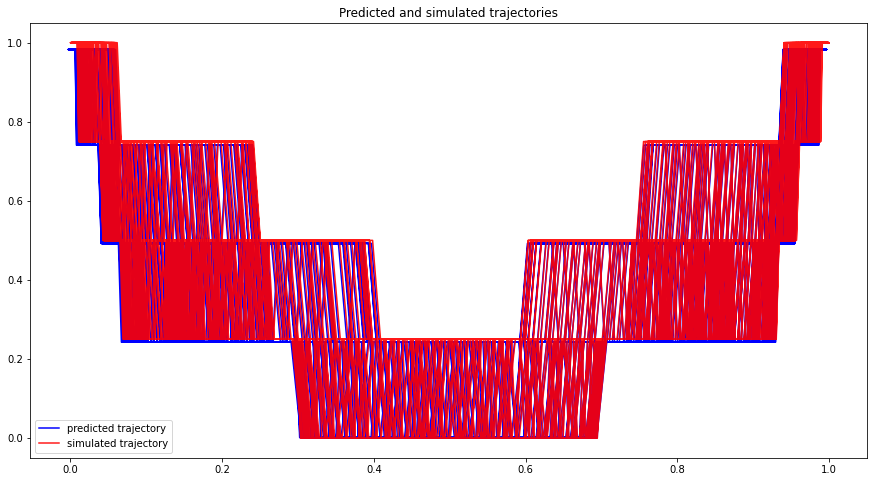

In [55]:
predictionX= np.loadtxt('predictionX0.txt')
predictionY= np.loadtxt('predictionY0.txt')
newtrainY= np.loadtxt('newtrainY0.txt')
newtrainX= np.loadtxt('newtrainX0.txt')

ax = plt.subplot(1,1,1)
plt.plot(predictionX, predictionY, 'b', label='predicted trajectory')
plt.plot(newtrainX, newtrainY, 'r', label='simulated trajectory', alpha=0.9)
plt.title('Predicted and simulated trajectories')
plt.legend()

fig = ax.figure
fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()

In [35]:
angle1 = 0.05
angle2 = 0
G = 9.81  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg

def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

dt = 0.01
t = np.arange(0.0, 100 , dt)
state = np.radians([angle1, 0, angle2, 0])
y = integrate.odeint(derivs, state, t)
x1 = 1 * sin(y[:, 0])
y1 = -1 * cos(y[:, 0])
x2 = 1 * sin(y[:, 2]) + x1
y2 = -1 * cos(y[:, 2]) + y1

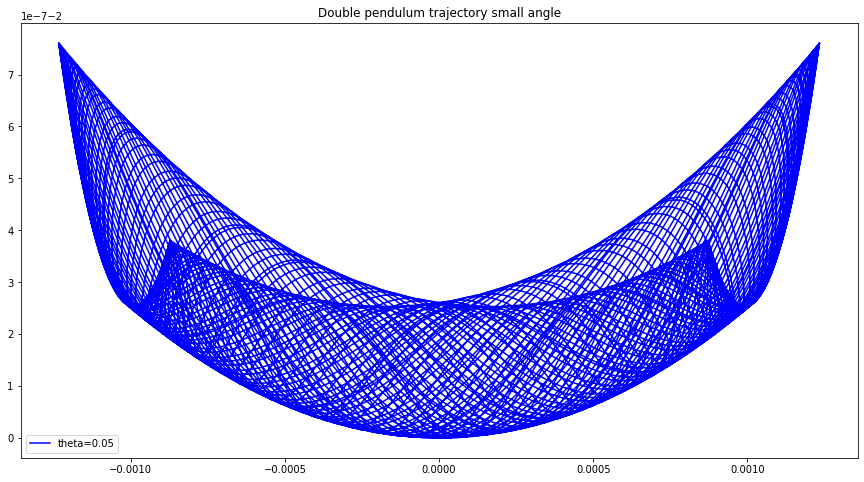

In [37]:
ax = plt.subplot(1,1,1)
plt.plot(x2, y2, 'b', label='theta=0.05')
plt.title('Double pendulum trajectory small angle')
plt.legend()

fig = ax.figure
fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()